<a href="https://colab.research.google.com/github/vatsalsaglani/DL-for-coders-part1-2019/blob/master/LESSON_4_tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h3>Installing FAST-AI</h3></center>

In [0]:
#   !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.tabular import *

<center><h1>Tabular DATA</h1></center>

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'] # categorical variables
cont_names = ['age', 'fnlwgt', 'education-num'] #continuous variables

In [0]:
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path = path, cat_names = cat_names, cont_names = cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names = cat_names, cont_names = cont_names, procs = procs).split_by_idx(list(range(800, 1000))).label_from_df(cols=dep_var).add_test(test, label = 0).databunch())

In [11]:
data.show_batch(rows = 10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,7th-8th,Divorced,Machine-op-inspct,Not-in-family,White,False,0.4701,0.1373,-2.3781,<50k
Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,False,-0.9959,-1.3676,1.1422,<50k
Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,False,0.1036,1.8033,-0.0312,<50k
Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,False,0.9098,-0.6724,1.1422,>=50k
Private,Masters,Married-civ-spouse,Tech-support,Husband,White,False,0.9098,-0.0702,1.5334,>=50k
?,Some-college,Never-married,?,Own-child,White,False,-1.2158,-0.6556,-0.0312,<50k
?,12th,Never-married,?,Not-in-family,White,False,-1.2158,-0.9657,-0.8135,<50k
Private,Assoc-voc,Divorced,Craft-repair,Unmarried,White,False,0.1036,-0.6182,0.3599,>=50k
Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,False,0.9831,0.1392,-0.4224,>=50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,1.5695,-0.4437,-0.4224,<50k


In [0]:
learn = tabular_learner(data, layers = [200, 100], metrics = accuracy)

In [14]:
learn.fit(10, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.355913,0.376157,0.835000
2,0.354937,0.360520,0.830000
3,0.363863,0.374968,0.840000
4,0.357943,0.386996,0.830000
5,0.346069,0.356658,0.845000
6,0.357010,0.355946,0.840000
7,0.352979,0.351877,0.835000
8,0.355513,0.342905,0.855000
9,0.350286,0.348966,0.835000
10,0.362206,0.348400,0.850000


In [15]:
lr_find(learn)

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


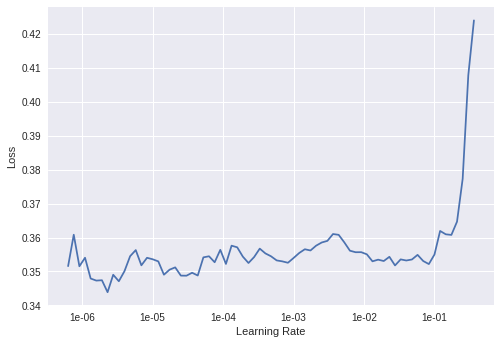

In [16]:
learn.recorder.plot()

In [19]:
learn.fit(10, 1e-3)

epoch,train_loss,valid_loss,accuracy
1,0.353648,0.345617,0.845000
2,0.349496,0.347468,0.855000
3,0.341937,0.345617,0.850000
4,0.339222,0.340865,0.855000
5,0.341437,0.341601,0.855000
6,0.332691,0.343776,0.860000
7,0.353293,0.339488,0.855000
8,0.350251,0.339174,0.855000
9,0.342722,0.341767,0.865000
10,0.339225,0.343834,0.860000
